In [1]:
import glob
import os, time
#import itertools
import numpy as np
#import seaborn as sns
import pandas as pd
from natsort import natsorted

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
#from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes
#from cycler import cycler
#from datetime import datetime, timedelta

#from scipy.stats import norm
#from scipy.optimize import curve_fit #we could import more, but this is what we need
#from scipy.stats import linregress

#from misc_process import normalize_max
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

%matplotlib inline

In [2]:
'''
Get paths to corresponsing folders
'''

# get the path to the project's main directory (e.g., Project051)
BASE_DIR_PATH = os.path.dirname(os.path.abspath(os.getcwd()))

# ------------------------- data folder -----------------------

# get the path to the folder containing raw data
DATA_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', '')

# get the path to the folder containing UV-Vis-NIR raw data
DATA_UV_DIR_PATH = os.path.join(BASE_DIR_PATH, 'data', 'UV-Vis-NIR','2022-02-21-sc-aunr-1','triplicate-opt-cond','')

# ------------------------- output folder -----------------------

# # get the path to the folder with generated figures
RESULT_DIR_PATH = os.path.join(BASE_DIR_PATH, 'results', 'figs', '')

# # get the path to the folder with generated dataframe
RESULT_DIR_PATH_CSV = os.path.join(BASE_DIR_PATH, 'results', 'csv', '')

In [3]:
# Path to folder containing CSV files
folder_path = DATA_UV_DIR_PATH

# Load reference CSV file
ref_df = pd.read_csv(os.path.join(folder_path, 'rev-obj.csv'))

# Initialize empty list to store norm values
norm_values = []
file_names = []

# Loop through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv') and filename != 'rev-obj.csv':
        # Load CSV file into a Pandas DataFrame
        df = pd.read_csv(os.path.join(folder_path, filename))
        
        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())     

        # Calculate the L2 norm of the difference between the normalized second column of the file and the reference file
        diff = df.iloc[:, 1] - ref_df.iloc[:, 1]

        norm_value = np.linalg.norm(diff)
        norm_value = round(norm_value, 2)
        
        # Add the norm value to the list
        norm_values.append((filename,norm_value))

# Print the list of all the norm values
print(natsorted(norm_values))

# save the loss values
df_triplicate_lost = pd.DataFrame(natsorted(norm_values))
df_triplicate_lost.to_csv(RESULT_DIR_PATH_CSV+'tiplicate-opt-loss.csv', header=None, index=False) 

[('exp18.csv', 6.63), ('exp18_1.csv', 6.75), ('exp18_2.csv', 6.72), ('exp18_3.csv', 6.58)]


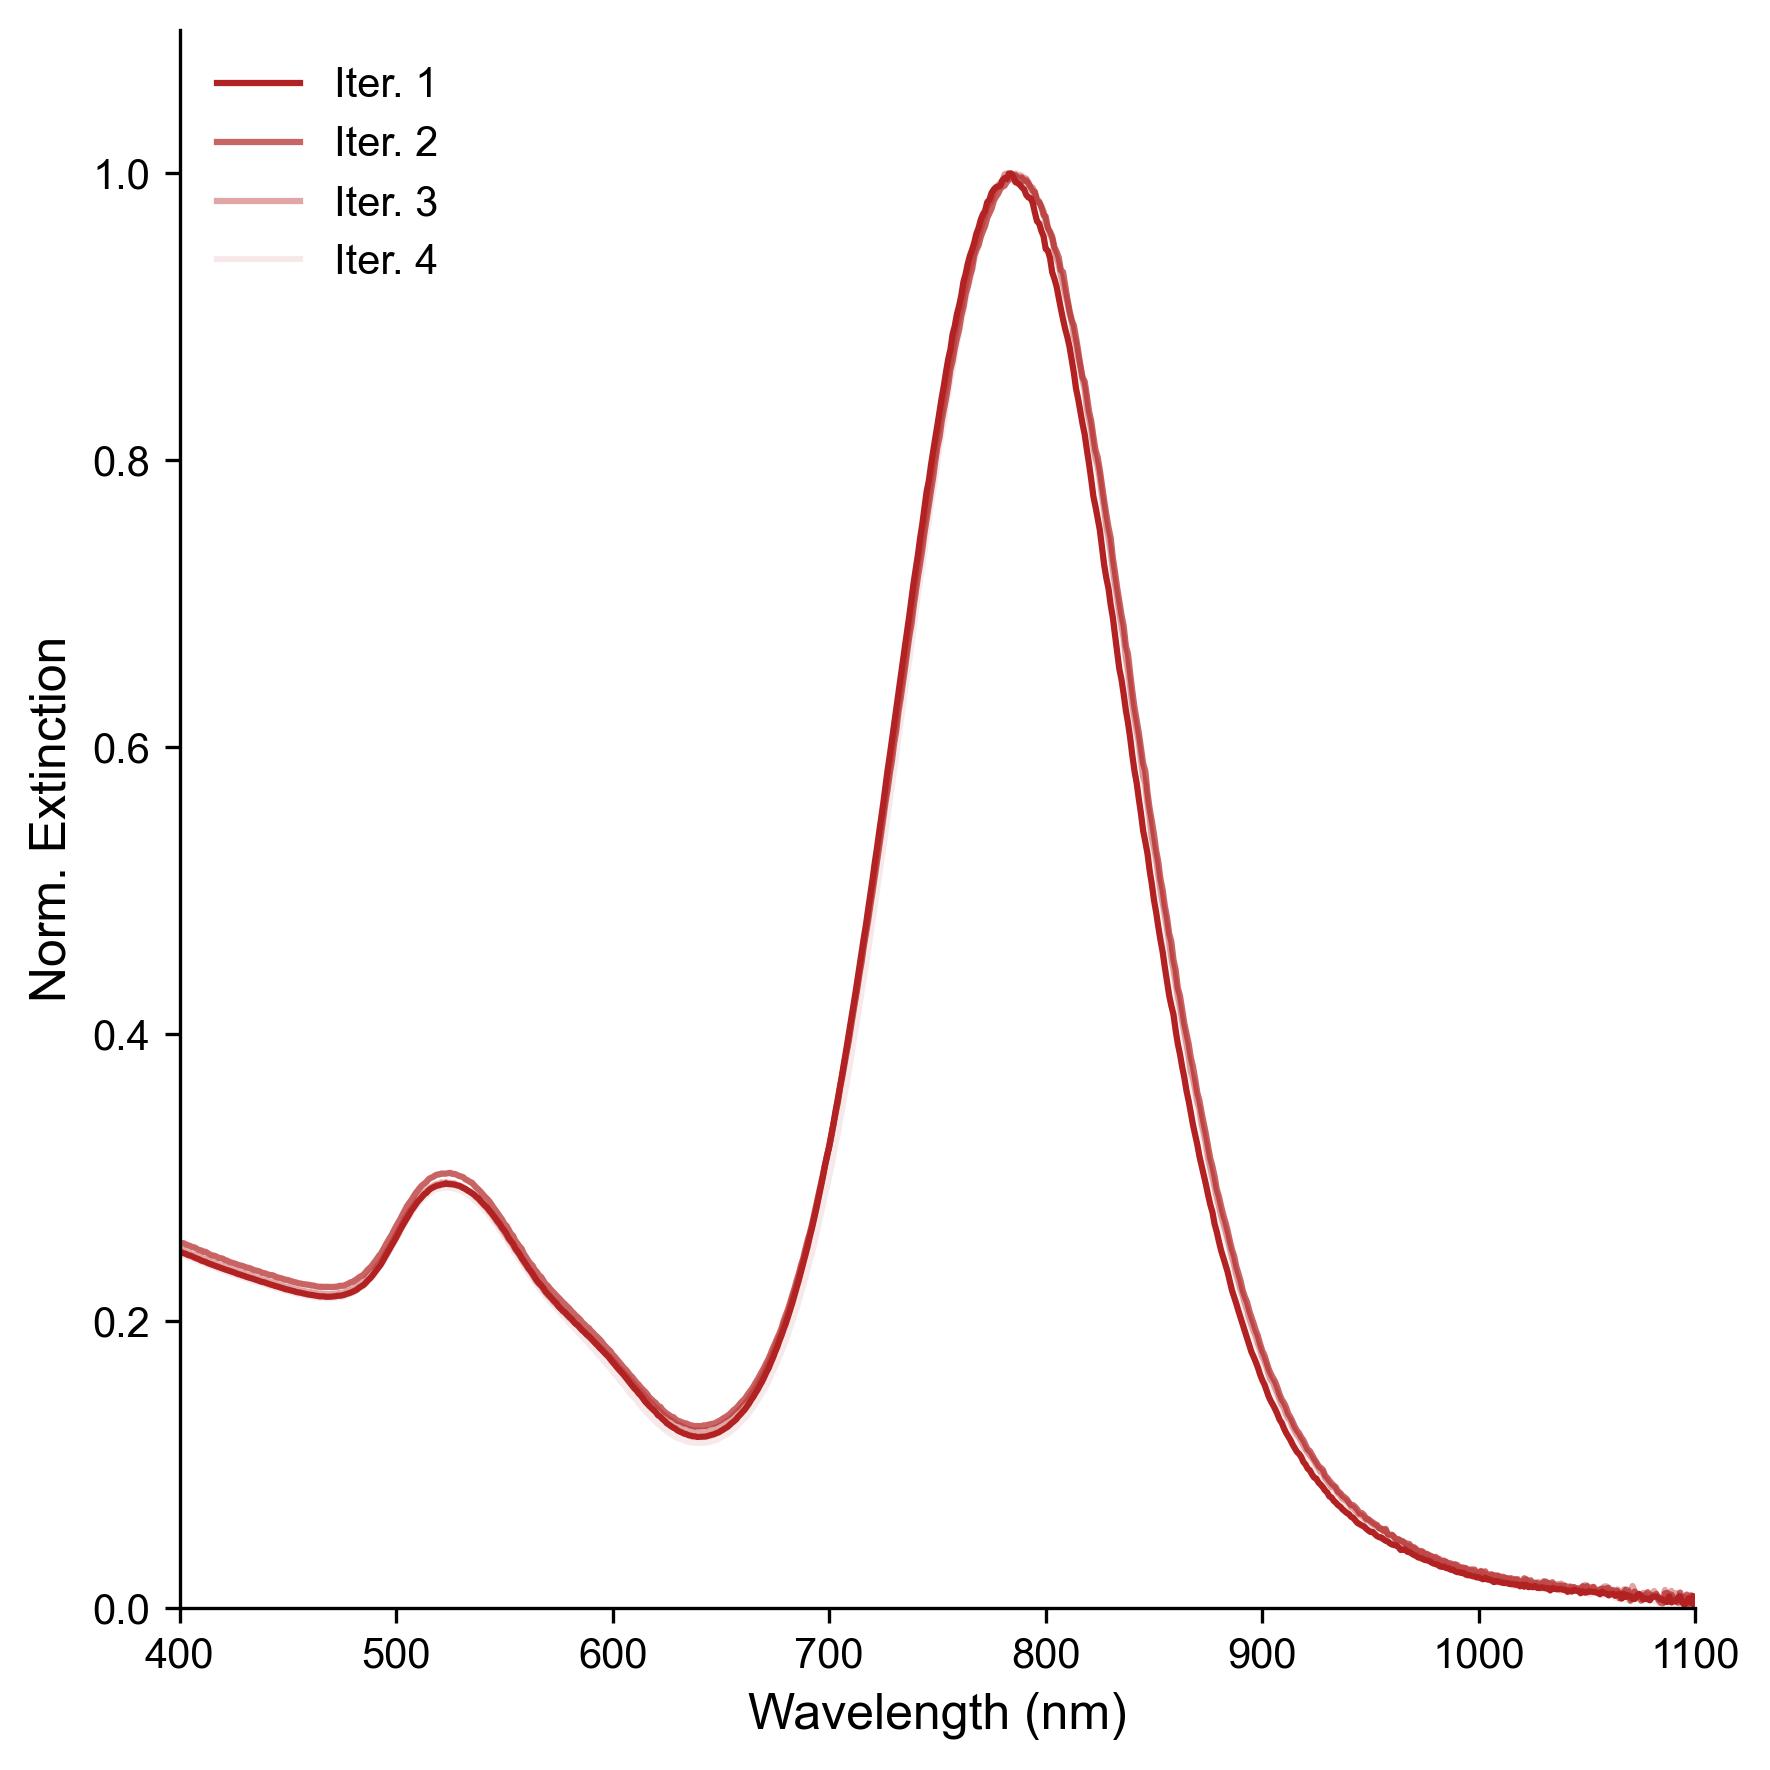

In [4]:

# Define the path to the folder containing the CSV files
folder_path = DATA_UV_DIR_PATH

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Define the reference CSV file name
ref_file_name = 'rev-obj.csv'

# Read the reference CSV file into a Pandas DataFrame
ref_df = pd.read_csv(os.path.join(folder_path, ref_file_name), header=None)

# Create a figure with 5 rows and 4 columns of subplots, 12 inches long and  inches wide, 300 dpi
fig, axs = plt.subplots(1, 1, figsize=(6, 6), dpi=300)

# Initialize variables to keep track of subplot indices
row_index = 0
col_index = 0

num = 1
alpha = 1

# Loop through all CSV files in the folder
for csv_file in natsorted(csv_files):
    
    # Check if the current file is not the reference file
    if os.path.basename(csv_file) != ref_file_name:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv(csv_file, header=None)

        # Normalize the second column of the DataFrame
        df.iloc[:, 1] = (df.iloc[:, 1] - df.iloc[:, 1].min()) / (df.iloc[:, 1].max() - df.iloc[:, 1].min())
        
        # Plot the normalized second column of the current file against the reference file in the current subplot
        axs.plot(df.iloc[:, 0], df.iloc[:, 1], color='firebrick', alpha = alpha, label='Iter. '+str(num))
        #axs[1, 1].fill_between(ref_df[0],0, ref_df[1], color = 'royalblue', label='Objective', alpha = 0.5)
        num = num+1
        alpha = alpha - 0.3
        axs.set_xlabel(r'Wavelength (nm)', fontsize='large')
        axs.set_ylabel(r'Norm. Extinction', fontsize='large')
        axs.legend(loc = 'upper left', frameon=False, fontsize='medium')
        axs.set_xlim(400,1100)
        axs.set_ylim([0,1.1])
        axs.spines[['right', 'top']].set_visible(False)

        fig.tight_layout()

        # Increment the column index
        col_index += 1

        # If the column index is equal to 5, reset it to 0 and increment the row index
        if col_index == 2:
            col_index = 0
            row_index += 1

plt.show()

# saving the figure
fig.savefig(RESULT_DIR_PATH+'Fig_3a.png', transparent=True, bbox_inches='tight', pad_inches=0.1)